In [1]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image

In [2]:
path = 'C:\\Users\\JIN\\Desktop\\machine\\homework2\\data\\车牌字符识别训练数据'
i = [];j = [];k = []
for _, dirnames, filenames in os.walk(path):
    if len(_)!=54 and _[-6:]!='letter' and _[-3:]!='num' and _[-4:]!='word':
        i+=[_]
    if dirnames!=[]:
        j+=[dirnames]
    if filenames!=[]:
        k+=[filenames]
dict_all = {}
tb = 0
for heads in j[1:]:
    for head in heads:
        dict_all.update({head:[]})
        for back in k[tb]:
            dirs = i[tb]+'\\'+back
            dict_all[head]+=[dirs]
        tb+=1
dict_dict = {'0': 0,'1': 1,'2': 2,'3': 3,'4': 4,'5': 5,'6': 6,'7': 7,'8': 8,'9': 9,'川': 11,'鄂': 12,'甘': 13,'赣': 14,'桂': 16,'贵': 17,'黑': 18,'沪': 19,'吉': 20,'冀': 21,'津': 22,'晋': 23,'京': 24,'辽': 25,'鲁': 26,'蒙': 27,'闽': 28,'宁': 29,'青': 30,'琼': 31,'陕': 32,'苏': 33,'皖': 34,'湘': 35,'渝': 37,'豫': 38,
'粤': 39,'云': 40,'浙': 41,'A': 42,'B': 43,'C': 44,'D': 45,'E': 46,'F': 47,'G': 48,'H': 49,'J': 51,'K': 52,'L': 53,'M': 54,'N': 55,'P': 57,'Q': 58,'R': 59,'S': 60,'T': 61,'U': 62,'V': 63,'W': 64,'X': 65,'Y': 66,'Z': 67}   
writer = tf.python_io.TFRecordWriter("all_s.tfrecords")
for labels in dict_all.keys():
    for imgs in dict_all[labels]:
        img = Image.open(imgs)
        #img = img.convert('1')
        img = img.resize((24,48), Image.ANTIALIAS)
        images = img.tobytes()
        try:
            label = dict_dict[labels]
        except:
            print('在字典中不能正常获得标签')
        example = tf.train.Example(features = tf.train.Features(feature = {
                         "label": tf.train.Feature(int64_list=tf.train.Int64List(value = [label])),
                         'img': tf.train.Feature(bytes_list=tf.train.BytesList(value = [images]))
                         })) 
        writer.write(example.SerializeToString())
writer.close()

In [3]:
dicts_dicts={}
for key,value in dict_dict.items():
    dicts_dicts.update({value:key})

(1,) (1, 48, 24, 1)
J


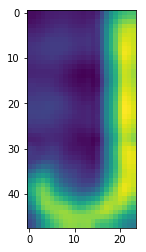

(1,) (1, 48, 24, 1)
A


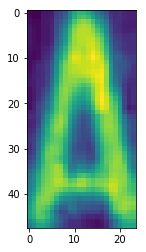

In [4]:
def read_tfrecord(path):
    filename_queue = tf.train.string_input_producer([path])
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)
    features = tf.parse_single_example(serialized_example,
                                       features={
                                       'label': tf.FixedLenFeature([], tf.int64),
                                       'img' : tf.FixedLenFeature([], tf.string),
                                       })
    image = tf.decode_raw(features['img'], tf.uint8)
    image = tf.cast(image, dtype='float32')*(1/255)-0.5 
    image = tf.reshape(image, [48, 24, 3])
    image = tf.split(image, 3, 2)[0]
    #image = tf.split(image, num_or_size_splits=3, axis=1)[0]
    label = tf.cast(features['label'], tf.int32)
    return image, label

import matplotlib.pyplot as plt
image, label = read_tfrecord("all_s.tfrecords")
image_batch, label_batch = tf.train.shuffle_batch([image,label], batch_size=1, capacity=6000, min_after_dequeue=5999, num_threads=2) 
init = tf.local_variables_initializer()
ii=[]
with tf.Session() as sess:
    sess.run(init)
    coord = tf.train.Coordinator() #创建一个协调器，管理线程
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)   #启动QueueRunner, 此时文件名队列已经进队
    for i in range(2):  # 规定出队数量
        img, label = sess.run([image_batch, label_batch])
        print(label.shape,img.shape)
        for j in range(1):
            print(dicts_dicts[label[j]])
            im = img[j].reshape(48,24)
            plt.imshow(im)
            plt.show()
    coord.request_stop()
    coord.join(threads)

In [5]:
ii = []
jj = []
labelss = []
image, label = read_tfrecord("all_s.tfrecords")
#image_batch, label_batch = tf.train.shuffle_batch([image,label], batch_size=1, capacity=2000, min_after_dequeue=0, num_threads=2) 
with tf.Session() as sess:
    sess.run(init)
    coord = tf.train.Coordinator() #创建一个协调器，管理线程
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)   #启动QueueRunner, 此时文件名队列已经进队
    for i in range(18447):  # 规定出队数量
        img, labeless = sess.run([image, label])
        #for j in range(1):
        im = img.reshape(48,24)
        ii += [im]
        jj += [dicts_dicts[labeless]]
        labelss += [labeless]
    coord.request_stop()
    coord.join(threads)


In [6]:
label_count={}
letter_label_count = {}
for kk in dict_dict.keys():
    if kk not in ['I','O','广','新','藏']:
        label_count.update({kk:jj.count(kk)})

for kk in dicts_dicts.keys():
    if kk not in [50,56,15,10,36]:
        letter_label_count.update({kk:jj.count(dicts_dicts[kk])})
#print(label_count)

D:\anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


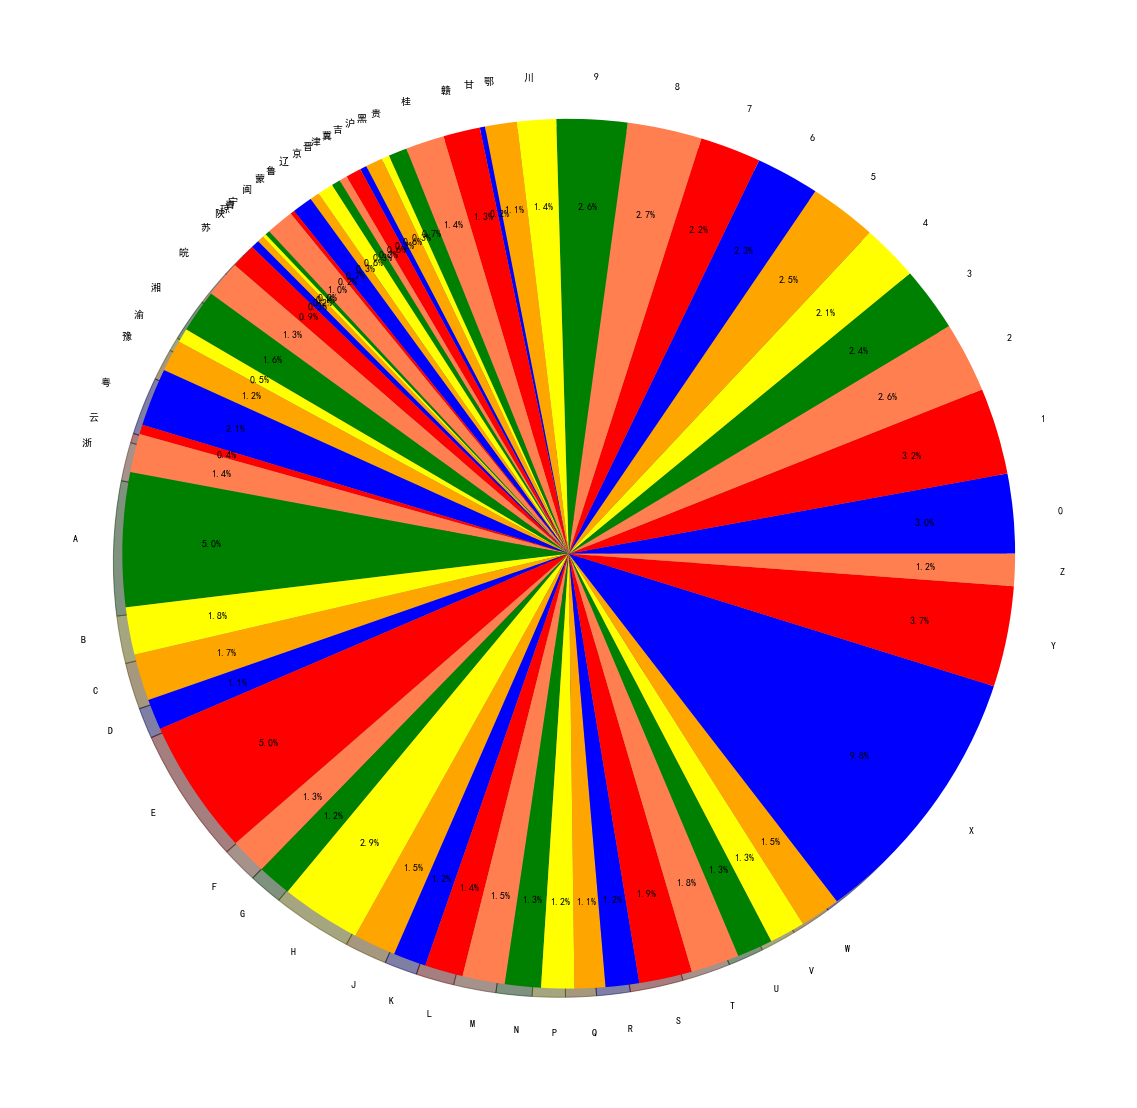

In [7]:
#coding:utf-8  
import matplotlib  
matplotlib.use('qt4agg')  
#指定默认字体  
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='sans-serif'  
plt.figure(1, figsize=(20,20))    
#expl = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]  
# Colors used. Recycle if not enough.  
colors  = ["blue","red","coral","green","yellow","orange"]  
# autopct: format of "percent" string;  
plt.pie(list(label_count.values()),  colors=colors, labels=list(label_count.keys()), autopct='%1.1f%%',pctdistance=0.8, shadow=True)  
plt.show()  

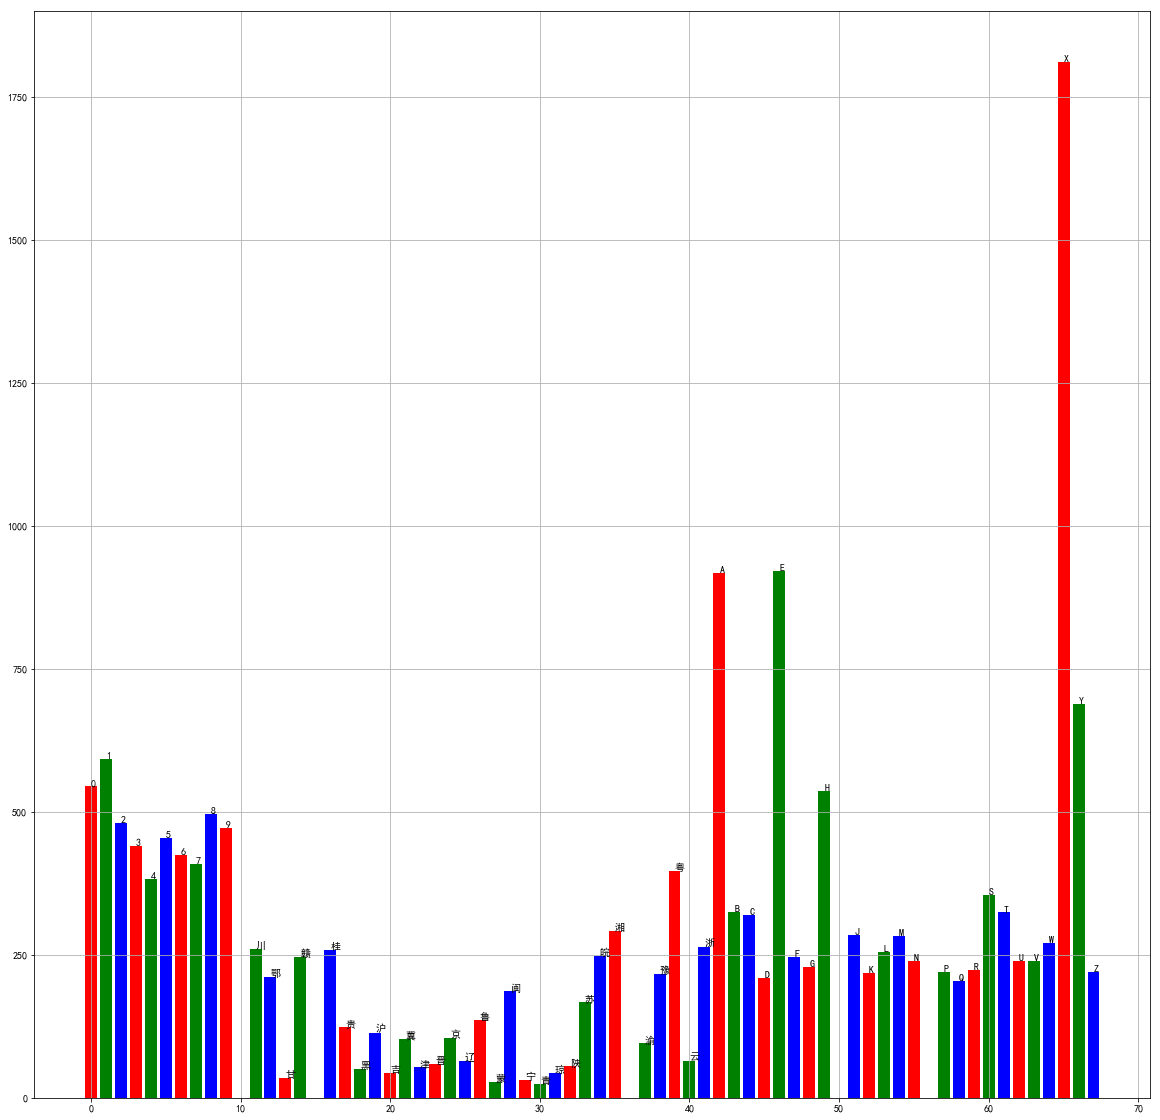

In [8]:
import matplotlib.pyplot as plt
plt.figure(2, figsize=(20,20))  
plt.bar(list(letter_label_count.keys()),list(letter_label_count.values()),color='rgb')
ll = 0
for iii in dicts_dicts.keys():
    plt.text(list(letter_label_count.keys())[ll],list(letter_label_count.values())[ll],dicts_dicts[iii])
    ll+=1
plt.grid()
plt.show()

In [9]:
c = list(zip(jj,ii))
import random
random.shuffle(c)
jj[:],ii[:]=zip(*c)

In [10]:
xtrain = ii[:15000]
ytrain = jj[:15000]
xtest = ii[15000:18000]
ytest = jj[15000:18000]
vtrain = ii[18000:18447]
vtest = jj[18000:18447]

In [11]:
xtrain = [ii[k].reshape(1152) for k in range(15000)]
xtest = [ii[k].reshape(1152) for k in range(15000,18000)]
vtrain = [ii[k].reshape(1152) for k in range(18000,18447)]

In [12]:
def knn_simple(xtrain, ytrain, xtest, ytest):
    start = time.time()
    xtr = tf.placeholder(tf.float32, [None, 1152])
    xte = tf.placeholder(tf.float32, [1152])
    
    distance = Euclidean_distance(xtr,xte)
    
    pred = tf.argmin(distance, 0)
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    right = 0
    for i in range(3000):
        if i % 100==0 and i !=0:
            print("已处理 {0}，正确率为{1}".format(i,right/i))
        #distance = sess.run(distance,{xtr: xtrain, xte: xtest[i]})
        index = sess.run(pred,{xtr: xtrain, xte: xtest[i]})
        #print(sess.run(distance[10036]))
        if np.argmax(ytest[i]) == np.argmax(ytrain[index]):	#这里的后半部分酌情更改
            right += 1.0
    print('总共处理%d 用时%f' %(3000,time.time()-start))
    print('正确数量%d 正确率为%f' %(right,right/3000))

In [13]:
def Euclidean_distance(xtr,xte):
    return tf.sqrt(tf.reduce_sum(tf.pow((xtr-xte), 2), reduction_indices=1))
import time
#knn_simple(xtrain, ytrain, xtest, ytest)

In [14]:
lbels = np.zeros([18447,68])
for i in range(len(jj)):
    lbels[i][dict_dict[jj[i]]]=1
for i in range(18447):
    ii[i] = ii[i].reshape(1152)
xtrain = ii[:15000]
xtest = ii[15000:18000]
vtrain = ii[18000:18447]
ytrain = lbels[:15000]
ytest = lbels[15000:18000]
vtest = lbels[18000:18447]

In [15]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.1))


def init_bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape))

In [21]:
sess = tf.InteractiveSession()

x_ = tf.placeholder(tf.float32, [None, 1152], name='image')
y = tf.placeholder(tf.float32, [None, 68], 'label')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')
x = tf.reshape(x_, [-1, 48, 24, 1], name='x')


w1 = init_weights([3, 3, 1, 32])
b1 = init_bias([32])
conv1 = tf.nn.relu(tf.nn.conv2d(x, w1,  strides=[1, 1, 1, 1], padding='SAME') + b1)  # shape=(?, 48, 24, 32)
pool1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  # # shape=(?, 24, 12, 32)



w2 = init_weights([3, 3, 32, 64])
b2 = init_bias([64])
conv2 = tf.nn.relu(tf.nn.conv2d(pool1, w2,  strides=[1, 1, 1, 1], padding='SAME') + b2)  # shape=(?, 24, 12, 64)
pool2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  # shape=(?, 12, 6, 64)

w3 = init_weights([3, 3, 64, 96])    
b3 = init_bias([96])
conv3 = tf.nn.relu(tf.nn.conv2d(pool2, w3,  strides=[1, 1, 1, 1], padding='SAME') + b3)  # shape=(?, 12, 6, 96)
pool3_ = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')  # shape=(?, 6, 3, 96)


pool3 = tf.reshape(pool3_, [-1, 6*3*96])

w4 = init_weights([6 * 3 * 96, 512])
b4 = init_bias([512])
h = tf.nn.relu(tf.matmul(pool3, w4) + b4)

h = tf.nn.dropout(h, keep_prob)

w_o = init_weights([512, 68])
b_o = init_bias([68])
y_o = tf.matmul(h, w_o) + b_o


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_o, labels=y))
train_op = tf.train.AdamOptimizer().minimize(cost)
prediction = tf.equal(tf.argmax(y_o, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32), name='accuracy')

In [ ]:
#image_batch, label_batch = tf.train.shuffle_batch([xtrain,ytrain], batch_size=50, capacity=2000, min_after_dequeue=1990, num_threads=2)
sess.run(tf.global_variables_initializer())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)
bs = 0
saver = tf.train.Saver() 
for i in range(1500):
    train_data_x = xtrain[bs:bs+50]
    train_data_y = ytrain[bs:bs+50]
    if i % 100 == 0:
        train_accuracy = sess.run(accuracy, feed_dict={x_: train_data_x, y: train_data_y, keep_prob: 1.0})
        print("step %d, accuracy:%g" % (i, train_accuracy))
    train_op.run(feed_dict={x_: train_data_x, y: train_data_y, keep_prob: 0.3})
    bs+=10
saver.restore(sess, r"./Model/model.ckpt")

step 0, accuracy:0
step 100, accuracy:0.54
step 200, accuracy:0.82
step 300, accuracy:0.9
step 400, accuracy:0.78
step 500, accuracy:0.92
step 600, accuracy:0.98
step 700, accuracy:0.96
step 800, accuracy:1
step 900, accuracy:0.98
step 1000, accuracy:0.96
step 1100, accuracy:0.98
step 1200, accuracy:1
step 1300, accuracy:0.98
step 1400, accuracy:1
INFO:tensorflow:Restoring parameters from ./Model/model.ckpt


In [26]:
saver.restore(sess, r"./Model/model")

INFO:tensorflow:Restoring parameters from ./Model/model


NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./Model/model
	 [[Node: save/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]

Caused by op 'save/RestoreV2_1', defined at:
  File "D:\anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\anaconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "D:\anaconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "D:\anaconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "D:\anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "D:\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "D:\anaconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "D:\anaconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "D:\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "D:\anaconda\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "D:\anaconda\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\anaconda\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-8bfd2bda7bb5>", line 6, in <module>
    saver = tf.train.Saver()
  File "D:\anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 1140, in __init__
    self.build()
  File "D:\anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 1172, in build
    filename=self._filename)
  File "D:\anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 688, in build
    restore_sequentially, reshape)
  File "D:\anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "D:\anaconda\lib\site-packages\tensorflow\python\training\saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "D:\anaconda\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 663, in restore_v2
    dtypes=dtypes, name=name)
  File "D:\anaconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "D:\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "D:\anaconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./Model/model
	 [[Node: save/RestoreV2_1 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_1/tensor_names, save/RestoreV2_1/shape_and_slices)]]


In [ ]:

train_data_x = xtrain
train_data_y = ytest
train_accuracy = sess.run(accuracy, feed_dict={x_: train_data_x, y: train_data_y, keep_prob: 1.0})
print("step, accuracy: %g" % (train_accuracy))